In [3]:
from os import listdir
from matplotlib import image
import random
import numpy as np

# load all images in a directory
np.random.RandomState(5)
random_indexes = np.random.choice(range(25000), 250)
loaded_images = list()
for i in range(250):
	# load image
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('../mirflickr25k/mirflickr/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

> loaded im1403.jpg (500, 338, 3)
> loaded im3514.jpg (374, 500, 3)
> loaded im22129.jpg (356, 500, 3)
> loaded im11990.jpg (500, 500, 3)
> loaded im15542.jpg (333, 500, 3)
> loaded im7236.jpg (500, 332, 3)
> loaded im16831.jpg (333, 500, 3)
> loaded im23648.jpg (409, 500, 3)
> loaded im8977.jpg (333, 500, 3)
> loaded im5243.jpg (333, 500, 3)
> loaded im6137.jpg (333, 500, 3)
> loaded im8639.jpg (500, 375, 3)
> loaded im2225.jpg (289, 500, 3)
> loaded im3045.jpg (334, 500, 3)
> loaded im19934.jpg (500, 500, 3)
> loaded im22479.jpg (333, 500, 3)
> loaded im3984.jpg (500, 500, 3)
> loaded im19550.jpg (375, 500, 3)
> loaded im5442.jpg (388, 500, 3)
> loaded im5600.jpg (332, 500, 3)
> loaded im20459.jpg (500, 333, 3)
> loaded im22898.jpg (333, 500, 3)
> loaded im22654.jpg (500, 378, 3)
> loaded im14723.jpg (493, 500, 3)
> loaded im16691.jpg (333, 500, 3)
> loaded im5376.jpg (375, 500, 3)
> loaded im4173.jpg (333, 500, 3)
> loaded im4576.jpg (500, 333, 3)
> loaded im5398.jpg (500, 333, 3)
>

> loaded im1276.jpg (500, 478, 3)
> loaded im15074.jpg (375, 500, 3)
> loaded im9629.jpg (332, 500, 3)
> loaded im7668.jpg (500, 334, 3)
> loaded im19861.jpg (334, 500, 3)
> loaded im10198.jpg (338, 500, 3)
> loaded im4948.jpg (400, 500, 3)


In [2]:
#1.
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
	if (index % 10) == 0:
		print('> processed %i images' % (index))

> processed 10 images
> processed 20 images
> processed 30 images
> processed 40 images
> processed 50 images
> processed 60 images
> processed 70 images
> processed 80 images
> processed 90 images
> processed 100 images
> processed 110 images
> processed 120 images
> processed 130 images
> processed 140 images
> processed 150 images
> processed 160 images
> processed 170 images
> processed 180 images
> processed 190 images
> processed 200 images
> processed 210 images
> processed 220 images
> processed 230 images
> processed 240 images
> processed 250 images


In [3]:
RED = 0
GREEN = 1
BLUE = 2
#2.a Mat ochikuvannya i dispersiya 
#RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_blue, D_blue))

Red:	mat ochikuvannya - 108.94,	dispersiya - 6343.89
Green:	mat ochikuvannya - 102.50,	dispersiya - 5751.75
Blue:	mat ochikuvannya - 94.52,	dispersiya - 6181.72


In [4]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans
        
#2.d Asimmetriya, ekscess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Ekscess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2) - 3
Ekscess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2) - 3
Ekscess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2) - 3
print('Red:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_red, Ekscess_red))
print('Green:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_green, Ekscess_green))
print('Blue:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_blue, Ekscess_blue))

Red:	Asimmetriya - 0.226,	Ekscess - -1.192
Green:	Asimmetriya - 0.336,	Ekscess - -1.035
Blue:	Asimmetriya - 0.519,	Ekscess - -0.984


In [5]:
#4. Gaussian models
Vector_A = np.array([np.array([M_red, D_red, Asym_red, Ekscess_red]),
                     np.array([M_green, D_green, Asym_green, Ekscess_green]),
                     np.array([M_blue, D_blue, Asym_blue, Ekscess_blue])])
print("Vector_A:\n" + str(Vector_A))
Vector_All_DATA = np.copy(Vector_A)
itear = 0
for image in loaded_images:
    image = np.reshape(image, (-1, 3))
    image = np.swapaxes(image, 0, 1)
    Vector_All_DATA = np.concatenate((Vector_All_DATA,image),axis=1)
    itear += 1
    if (itear % 10 == 0):
        print(str(itear) + " img")

Vector_A:
[[ 1.08940880e+02  6.34388748e+03  2.25918829e-01 -1.19185969e+00]
 [ 1.02500288e+02  5.75175243e+03  3.35696359e-01 -1.03473417e+00]
 [ 9.45209402e+01  6.18172175e+03  5.19405311e-01 -9.83653175e-01]]
10 img
20 img
30 img
40 img
50 img
60 img
70 img
80 img
90 img
100 img
110 img
120 img
130 img
140 img
150 img
160 img
170 img
180 img
190 img
200 img
210 img
220 img
230 img
240 img
250 img


In [6]:
print("All vals vector:\n" + str(Vector_All_DATA))

All vals vector:
[[1.08940880e+02 6.34388748e+03 2.25918829e-01 ... 1.07000000e+02
  1.05000000e+02 1.06000000e+02]
 [1.02500288e+02 5.75175243e+03 3.35696359e-01 ... 9.80000000e+01
  9.60000000e+01 9.70000000e+01]
 [9.45209402e+01 6.18172175e+03 5.19405311e-01 ... 8.90000000e+01
  8.70000000e+01 8.80000000e+01]]


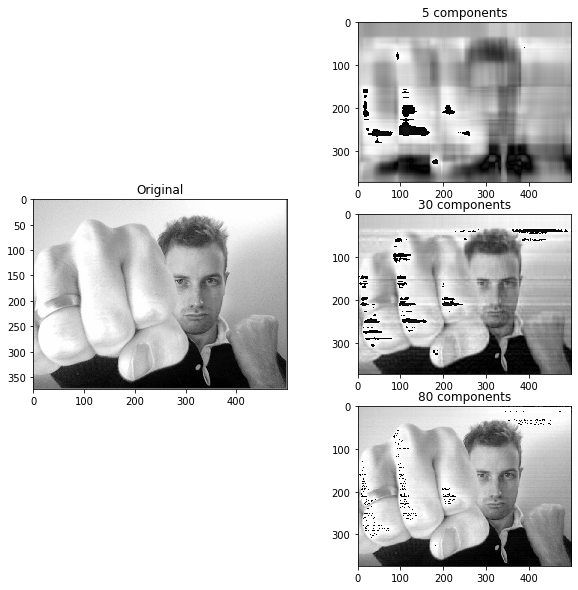

In [109]:
#5. a.Restoring using PCA
import scipy
import scipy.ndimage
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

test_img = loaded_images[1]
a_np = np.array(test_img)
a_r = a_np[:,:,0]
a_g = a_np[:,:,1]
a_b = a_np[:,:,2]

def PCA_2d(image_2d, numpc):
	cov_mat = image_2d - np.mean(image_2d)
	eig_val, eig_vec = np.linalg.eigh(np.cov(cov_mat))
	p = np.size(eig_vec, axis =1)
	idx = np.argsort(eig_val)
	idx = idx[::-1]
	eig_vec = eig_vec[:,idx]
	eig_val = eig_val[idx]
    
	if numpc <p or numpc >0:
		eig_vec = eig_vec[:, range(numpc)]
	score = np.dot(eig_vec.T, cov_mat)
	recon = np.dot(eig_vec, score) + np.mean(image_2d).T
	recon_img_mat = np.uint8(np.absolute(recon))
	return recon_img_mat

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 5), PCA_2d(a_g, 5), PCA_2d(a_b, 5)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig=plt.figure(figsize=(10, 10))
fig.add_subplot(1, 2, 1)
plt.title('Original')
plt.imshow(loaded_images[1])
fig.add_subplot(3, 2, 2)
plt.title('5 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 30), PCA_2d(a_g, 30), PCA_2d(a_b, 30)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 4)
plt.title('30 components')
plt.imshow(recon_color_img)

a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, 80), PCA_2d(a_g, 80), PCA_2d(a_b, 80)
recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
fig.add_subplot(3, 2, 6)
plt.title('80 components')
plt.imshow(recon_color_img)
plt.show()
# recon_color_img = Image.fromarray(recon_color_img)
# recon_color_img.show()

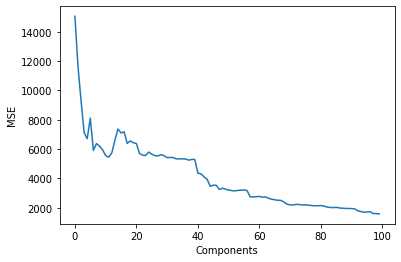

In [116]:
# b.calculating MSE
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    return err

mse_list = list()
for i in range(100):
    a_r_recon, a_g_recon, a_b_recon = PCA_2d(a_r, i), PCA_2d(a_g, i), PCA_2d(a_b, i)
    recon_color_img = np.dstack((a_r_recon, a_g_recon, a_b_recon))
    mse_list.append(mse(test_img, recon_color_img))
plt.plot(range(len(mse_list)),mse_list)
plt.xlabel("Components")
plt.ylabel("MSE")
plt.show()

In [182]:
#6 Markov chain:

markov_matrix1 = np.zeros(shape=(256, 256))
arr = a_r.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix1[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
print("Red matrix 1st oder:\n", markov_matrix)
print("\nRed matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix2 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix2[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix2[0] / sum(markov_matrix2[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix2[i] / sum(markov_matrix2[i])))
print("\n\nGreen matrix 1st oder:\n", markov_matrix)
print("\nGreen matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

markov_matrix3 = np.zeros(shape=(256, 256))
arr = a_g.flatten()
prev_color = arr[0]
for i in range(len(arr) - 1):
    markov_matrix3[arr[i]][arr[i + 1]] += 1
markov_matrix = markov_matrix3[0] / sum(markov_matrix3[0])
for i in range(1, 256):
    markov_matrix = np.vstack((markov_matrix, markov_matrix3[i] / sum(markov_matrix3[i])))
print("\n\nBlue matrix 1st oder:\n", markov_matrix)
print("\nBlue matrix 2nd order:\n", np.linalg.matrix_power(markov_matrix, 2))

Red matrix 1st oder:
 [[0.58611599 0.18189807 0.08699473 ... 0.         0.         0.        ]
 [0.28815789 0.31973684 0.15657895 ... 0.         0.         0.        ]
 [0.11484594 0.19047619 0.21568627 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.44003355 0.25440313 0.03830025]
 [0.         0.         0.         ... 0.08036475 0.8689279  0.01440259]
 [0.         0.         0.         ... 0.28350515 0.31958763 0.09450172]]

Red matrix 2nd order:
 [[0.4110173  0.18780878 0.11128418 ... 0.         0.         0.        ]
 [0.28831017 0.19631439 0.13281709 ... 0.         0.         0.        ]
 [0.16577297 0.14671475 0.13453265 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.27252748 0.36613865 0.03273738]
 [0.         0.         0.         ... 0.11549346 0.78282687 0.01808462]
 [0.         0.         0.         ... 0.22074426 0.39910182 0.03226595]]


Green matrix 1st oder:
 [[0.58611599 0.18189807 0.08699473 ... 0

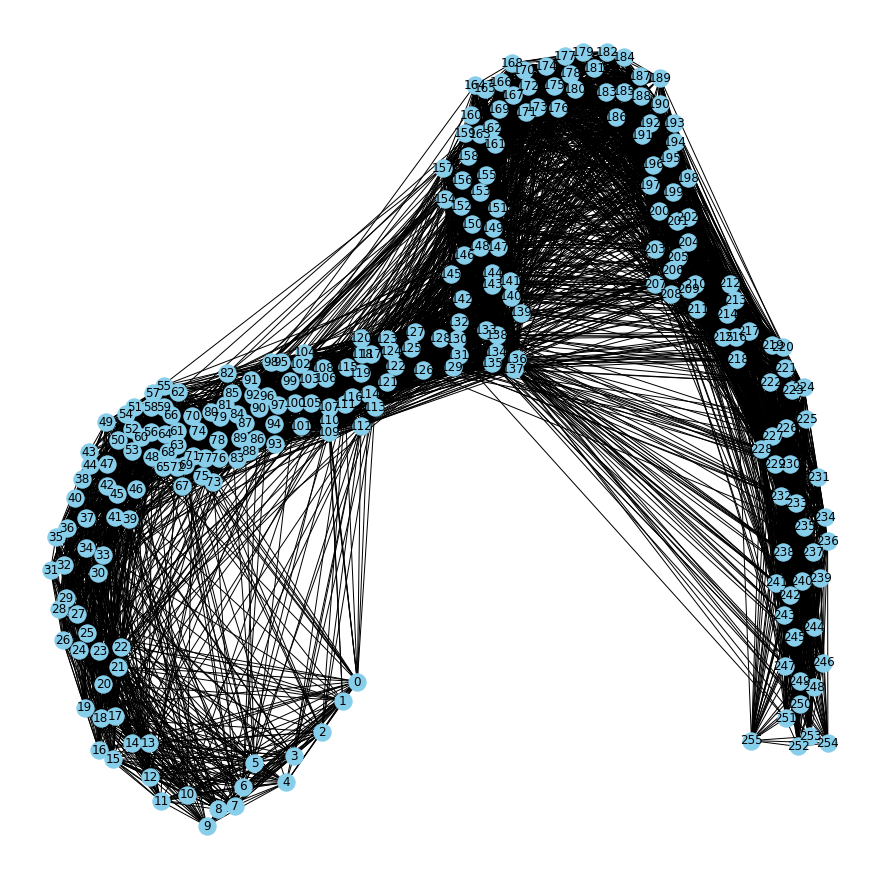

In [196]:
#Graph
import networkx as nx
import pandas as pd

data = markov_matrix
data = np.triu(data) + np.triu(data).T
ind = [str(i) for i in range(data.shape[0])]
df2 = pd.DataFrame(data, index=ind, columns=ind)
plt.figure(1,figsize=(12,12))  
G2 = nx.from_pandas_adjacency(df2)

nx.draw(G2, with_labels=True, node_color='skyblue')
plt.show()